In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Introduction tot data assimilation
## Practical session day 1 
### D1.1. Numerical solution of an ODE: logistic growth

We consider the following ODE that models the logistic growth of a population:

$$
\left\{\begin{array}{lr}
y^{\prime}(t)=\alpha y(t)(1-y(t) / K), & t \in[0, T] \\
y(t=0)=y_{0}, & t=0
\end{array}\right.
$$

for some given constants $\alpha>0$ and $K>0$. The initial population is $y_{0}>0$.

- implement the numerical solution of this ODE, and plot the solution.

- change the values of $\alpha, K$ and $y_{0}$ (one parameter at a time!).

Note: an analytical solution of the logistic equation can be calculated. We propose not to use this analytical solution.

In [5]:
parameters = {'alpha':0.1, 'K':1e4}
y0 = 1.0

def logistic(t,y,alpha,K):
    return alpha*y*(1-y/K)


T = 200
numpoints = 100
timepoints = np.linspace(0,T,numpoints)

sol = solve_ivp(logistic,[0,T],[1.0],t_eval=timepoints,args=(parameters['alpha'],parameters['K']))
y = np.reshape(sol.y,(numpoints))


plt.figure(figsize=(20,6))
plt.plot(timepoints,y,'r',label='Solution')
plt.plot(timepoints,parameters['K']*np.ones(numpoints),':k',label='Asymptotic value')
plt.legend()
plt.title('Solution of the logistic model');

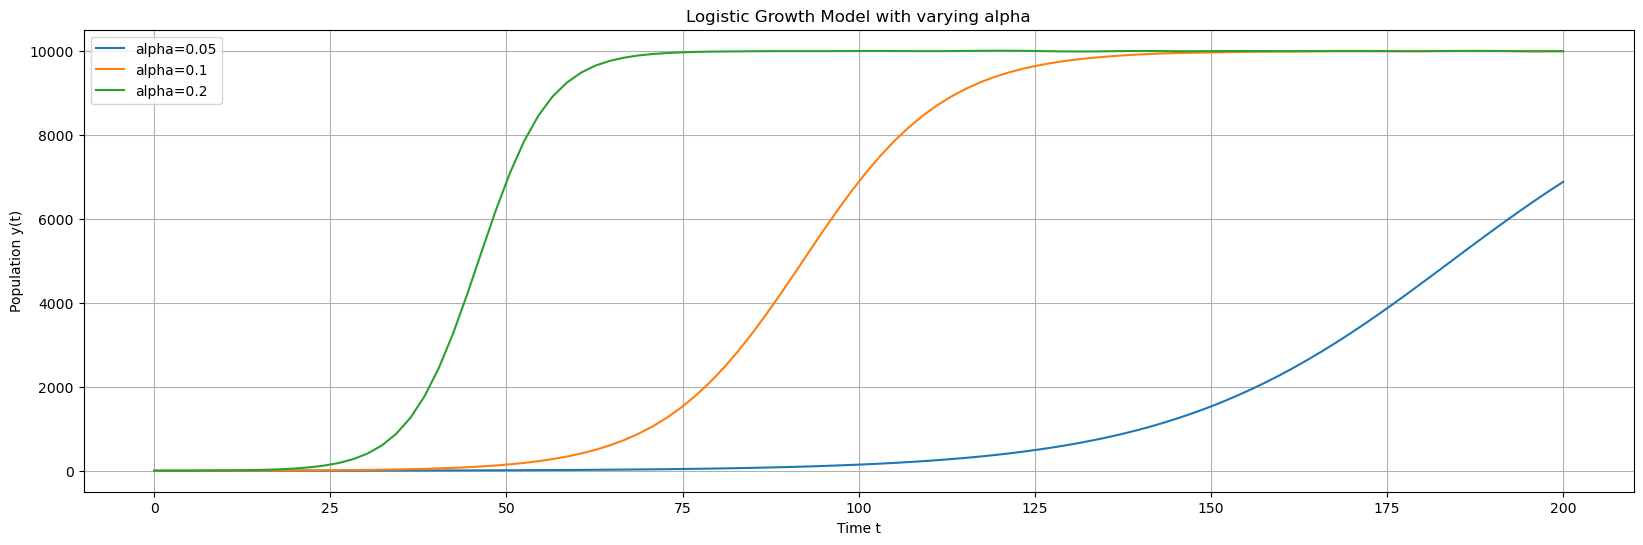

In [10]:
alpha_values = [0.05, 0.1, 0.2]
plt.figure(figsize=(20,6))
for alpha in alpha_values:
    solution = solve_ivp(logistic, [0, T], [y0], args=(alpha, 1e4), t_eval=timepoints)
    plt.plot(solution.t, solution.y[0], label=f'alpha={alpha}')

plt.xlabel('Time t')
plt.ylabel('Population y(t)')
plt.title('Logistic Growth Model with varying alpha')
plt.legend()
plt.grid()
plt.show()

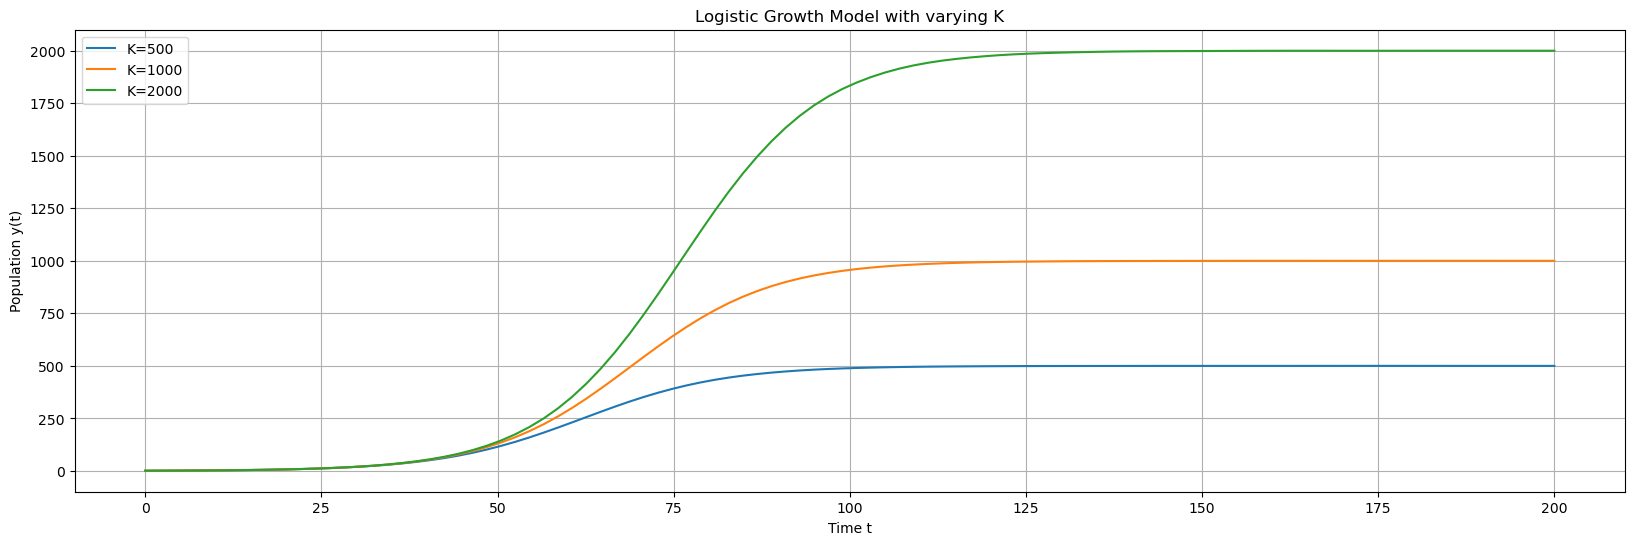

In [12]:
K_values = [500, 1000, 2000]
plt.figure(figsize=(20,6))
for K in K_values:
    solution = solve_ivp(logistic, [0, T], [y0], args=(0.1, K), t_eval=timepoints)
    plt.plot(solution.t, solution.y[0], label=f'K={K}')

plt.xlabel('Time t')
plt.ylabel('Population y(t)')
plt.title('Logistic Growth Model with varying K')
plt.legend()
plt.grid()
plt.show()


In [13]:
y0_values = [10, 50, 100]
plt.figure(figsize=(20,6))
for y0 in y0_values:
    solution = solve_ivp(logistic, [0, T], [y0], args=(0.1, 1e4), t_eval=timepoints)
    plt.plot(solution.t, solution.y[0], label=f'y0={y0}')

plt.xlabel('Time t')
plt.ylabel('Population y(t)')
plt.title('Logistic Growth Model with varying y0')
plt.legend()
plt.grid()
plt.show()